# Mini-batch Gradient Descent

Mini batch Gradient Descent is a varient of gradient descent algoritm but the idea is to train the model in batches.In each iteration, we update the weights of all the training samples in a particular batch followed by the next until the whole training data is processed. Compared to batch gradient descent, this approch reduce computation time and memory usage significantly.

we can use `DataLoader` module in pytorch to load and preprocess data which can be used to create batches.

**Implementation tips:**
- If your training set has less that 2000 data points then use batch gradient descent because mini-batch gradient descent won't make of a difference.
- Make the batch sizes to be multiples of 2 i.e, 32,64,128,256,512 etc considering how GPU/CPU's process data internally.
- Make sure that your mini-batch fits in your GPU/CPU's memory.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import utils
import numpy as np
from tqdm import tqdm

Number of training examples: 480
Number of testing examples: 120
Shape of train set: torch.Size([480, 2])
Shape of test set: torch.Size([120, 2])


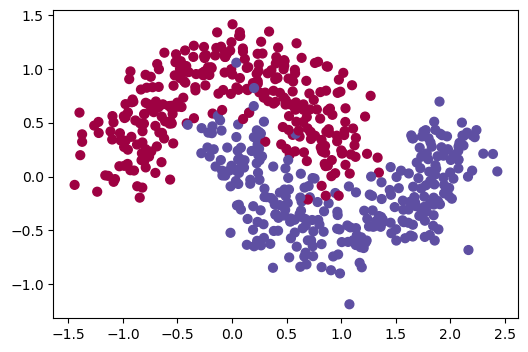

In [2]:
X_train, X_test, y_train, y_test = utils.create_dataset()

Our training set have only 480 examples but we will still use mini-batch gradient descent to study and implement it in pytorch

In [3]:
#Calling the model
model = utils.create_classifier(2,1)

#Defining the hyper-parameters
LEARNING_RATE = 0.01
EPOCHS = 2000
BATCH_SIZE = 32

#creating data-loaders
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

#defining optimizer and loss metrics
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [4]:
def train_one_epoch(model, train_loader, loss_function, optimizer):
    """This function trains data in batches and returns metrics for a single epoch"""
    metrics = {'train_loss': [], 'train_acc': []}
    for batch in train_loader:
        #unpacing the batch
        batch_X, batch_y = batch
        #Forward propagation
        train_preds = model(batch_X)
        train_loss = loss_function(train_preds, batch_y)
        #calculating accuracy and storing metrics
        train_acc = utils.calculate_accuracy(train_preds, batch_y)
        metrics['train_loss'].append(train_loss.item())
        metrics['train_acc'].append(train_acc.item())
        #backpropagation
        optimizer.zero_grad()
        train_loss.backward()
        #gradient-descent step
        optimizer.step()
    return metrics

def test_one_epoch(model, test_loader, loss_function):
    """This function calculates and returns losses and accs batch wise for each epoch"""
    metrics = {'test_loss': [], 'test_acc': []}
    with torch.no_grad():
        for batch in test_loader:
            batch_X, batch_y = batch
            test_preds = model(batch_X)
            test_loss = loss_function(test_preds, batch_y)
            test_acc = utils.calculate_accuracy(test_preds, batch_y)
            metrics['test_loss'].append(test_loss.item())
            metrics['test_acc'].append(test_acc.item())
    return metrics

def train_model(model, train_loader, test_loader, loss_function, optimizer, epochs):
    """This function creates the training loop"""
    metrics = {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': []}
    for epoch in tqdm(range(1, epochs+1), leave=False):
        train_metrics = train_one_epoch(model, train_loader, loss_function, optimizer)
        test_metrics = test_one_epoch(model, test_loader, loss_function)

        metrics['train_loss'].extend(train_metrics['train_loss'])
        metrics['test_loss'].extend(test_metrics['test_loss'])
        metrics['train_acc'].extend(train_metrics['train_acc'])
        metrics['test_acc'].extend(test_metrics['test_acc'])

        if epoch % 100 == 0:
            print(f'Epoch: {epoch} \t|' \
                f' Train loss: {np.round(metrics["train_loss"][-1],3)} \t|' \
                f' Test loss: {np.round(metrics["test_loss"][-1],3)} \t|' \
                f' Train acc: {np.round(metrics["train_acc"][-1],2)} \t|' \
                f' Test acc: {np.round(metrics["test_acc"][-1],2)}')

    # Calculate the average accuracy of the last epoch
    final_train_acc = np.mean(metrics["train_acc"][-len(train_loader):])
    final_test_acc = np.mean(metrics["test_acc"][-len(test_loader):])

    print(f'Final Train Accuracy: {np.round(final_train_acc,2)}')
    print(f'Final Test Accuracy: {np.round(final_test_acc,2)}')

    return metrics

In [5]:
metrics = train_model(model, train_loader, test_loader, loss_function, optimizer, EPOCHS)

  5%|█████▉                                                                                                             | 104/2000 [00:02<00:51, 36.83it/s]

Epoch: 100 	| Train loss: 0.224 	| Test loss: 0.389 	| Train acc: 0.94 	| Test acc: 0.79


 10%|███████████▊                                                                                                       | 206/2000 [00:05<00:49, 36.05it/s]

Epoch: 200 	| Train loss: 0.157 	| Test loss: 0.341 	| Train acc: 0.94 	| Test acc: 0.79


 15%|█████████████████▌                                                                                                 | 306/2000 [00:08<00:43, 38.72it/s]

Epoch: 300 	| Train loss: 0.154 	| Test loss: 0.244 	| Train acc: 0.94 	| Test acc: 0.88


 20%|███████████████████████▏                                                                                           | 403/2000 [00:11<00:47, 33.50it/s]

Epoch: 400 	| Train loss: 0.136 	| Test loss: 0.136 	| Train acc: 0.91 	| Test acc: 0.96


 25%|████████████████████████████▉                                                                                      | 504/2000 [00:14<00:49, 30.26it/s]

Epoch: 500 	| Train loss: 0.081 	| Test loss: 0.111 	| Train acc: 1.0 	| Test acc: 0.92


 30%|██████████████████████████████████▊                                                                                | 606/2000 [00:17<00:40, 34.68it/s]

Epoch: 600 	| Train loss: 0.02 	| Test loss: 0.105 	| Train acc: 1.0 	| Test acc: 0.92


 35%|████████████████████████████████████████▎                                                                          | 702/2000 [00:20<00:35, 36.63it/s]

Epoch: 700 	| Train loss: 0.059 	| Test loss: 0.11 	| Train acc: 1.0 	| Test acc: 0.92


 40%|██████████████████████████████████████████████▏                                                                    | 803/2000 [00:23<00:33, 36.14it/s]

Epoch: 800 	| Train loss: 0.094 	| Test loss: 0.133 	| Train acc: 0.97 	| Test acc: 0.92


 45%|████████████████████████████████████████████████████▏                                                              | 907/2000 [00:25<00:27, 40.39it/s]

Epoch: 900 	| Train loss: 0.302 	| Test loss: 0.097 	| Train acc: 0.91 	| Test acc: 0.92


 50%|█████████████████████████████████████████████████████████▎                                                        | 1006/2000 [00:28<00:30, 32.19it/s]

Epoch: 1000 	| Train loss: 0.035 	| Test loss: 0.078 	| Train acc: 1.0 	| Test acc: 1.0


 55%|██████████████████████████████████████████████████████████████▉                                                   | 1105/2000 [00:31<00:22, 39.88it/s]

Epoch: 1100 	| Train loss: 0.059 	| Test loss: 0.118 	| Train acc: 1.0 	| Test acc: 0.92


 60%|████████████████████████████████████████████████████████████████████▋                                             | 1205/2000 [00:34<00:23, 34.18it/s]

Epoch: 1200 	| Train loss: 0.097 	| Test loss: 0.119 	| Train acc: 0.94 	| Test acc: 0.92


 65%|██████████████████████████████████████████████████████████████████████████▍                                       | 1305/2000 [00:36<00:16, 43.00it/s]

Epoch: 1300 	| Train loss: 0.055 	| Test loss: 0.109 	| Train acc: 1.0 	| Test acc: 0.92


 70%|████████████████████████████████████████████████████████████████████████████████                                  | 1405/2000 [00:39<00:18, 32.76it/s]

Epoch: 1400 	| Train loss: 0.207 	| Test loss: 0.096 	| Train acc: 0.91 	| Test acc: 0.92


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                            | 1505/2000 [00:42<00:13, 37.48it/s]

Epoch: 1500 	| Train loss: 0.26 	| Test loss: 0.09 	| Train acc: 0.91 	| Test acc: 0.92


 80%|███████████████████████████████████████████████████████████████████████████████████████████▌                      | 1607/2000 [00:44<00:10, 35.93it/s]

Epoch: 1600 	| Train loss: 0.043 	| Test loss: 0.079 	| Train acc: 1.0 	| Test acc: 0.96


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1704/2000 [00:47<00:06, 45.27it/s]

Epoch: 1700 	| Train loss: 0.073 	| Test loss: 0.118 	| Train acc: 0.97 	| Test acc: 0.92


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 1805/2000 [00:49<00:04, 44.51it/s]

Epoch: 1800 	| Train loss: 0.084 	| Test loss: 0.08 	| Train acc: 0.97 	| Test acc: 0.96


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1907/2000 [00:52<00:02, 41.62it/s]

Epoch: 1900 	| Train loss: 0.018 	| Test loss: 0.104 	| Train acc: 1.0 	| Test acc: 0.92


Epoch: 2000 	| Train loss: 0.134 	| Test loss: 0.081 	| Train acc: 0.97 	| Test acc: 0.96
Final Train Accuracy: 0.97
Final Test Accuracy: 0.97


We got a average final train accuracy of 97% and test accuracy of 97% using mini-batch gradient descent compared to 85% train and 86% test accuracy using batch gradient descent

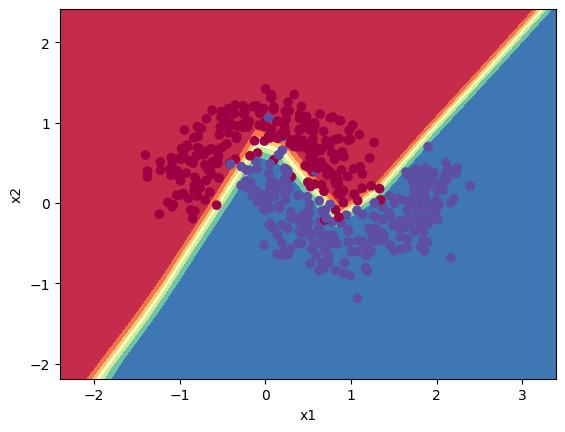

In [6]:
utils.plot_decision_boundary(model, X_train, y_train)

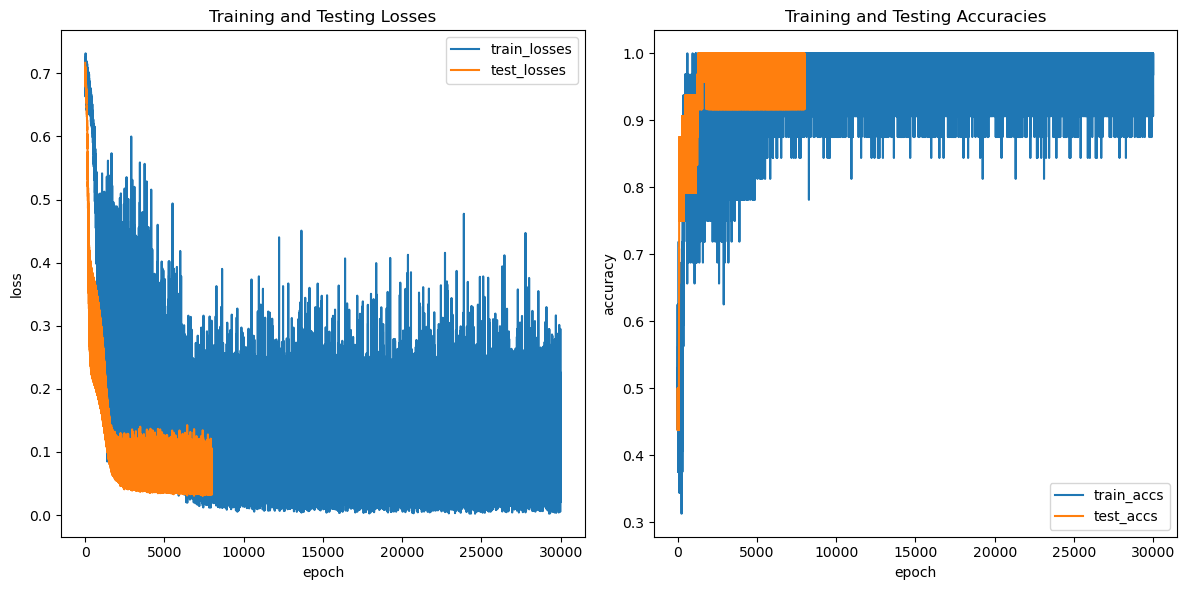

In [7]:
train_losses = metrics['train_loss']
test_losses = metrics['test_loss']
train_accs = metrics['train_acc']
test_accs = metrics['test_acc']
utils.plot_metrics(train_losses, test_losses, train_accs, test_accs)